# DATA SOURCE

[Kaggle Competition](https://www.kaggle.com/competitions/bengaliai-speech/overview)

[OOD-Speech: A Large Bengali Speech Recognition Dataset for Out-of-Distribution Benchmarking](https://arxiv.org/abs/2305.09688)

The goal of this competition is to recognize Bengali speech from out-of-distribution audio recordings. You will build a model trained on the first Massively Crowdsourced (MaCro) Bengali speech dataset with 1,200 hours of data from ~24,000 people from India and Bangladesh. The test set contains samples from 17 different domains that are not present in training.

Bengali is one of the most spoken languages in the world, with approximately 340 million native and second-language speakers globally. With that comes diversity in dialects and prosodic features (combinations of sounds). For example, Muslim religious sermons in Bengali are often delivered with a pace and tonality that is significantly different from regular speech.

download the zipfile in root using the following

```bash
kaggle competitions download -c bengaliai-speech
```
rest of the codes should work

# IMPORTS

In [1]:
%load_ext blackcellmagic

In [2]:
import pandas as pd
import io
import zipfile
import os
import random
import joblib
from IPython.display import Audio
import librosa
# import librosa.display
import matplotlib.pyplot as plt

In [3]:
def specific_files_extract_from_zipfile(
    specific_files_to_extract: list[str], zip_file_path: str, destination_folder: str
):
    # Open the zip file using zipfile.ZipFile
    with zipfile.ZipFile(zip_file_path, "r") as my_zip:
        # Create the destination folder if it doesn't exist
        if not os.path.exists(destination_folder):
            os.makedirs(destination_folder)

        # Extract the specific files to the destination folder
        for file_name in specific_files_to_extract:
            my_zip.extract(file_name, destination_folder)

In [4]:
# file name
ZIP_FILE_PATH: str = "bengaliai-speech.zip"
DESTINATION_FOLDER: str = "./data"

# read file list

In [5]:
# # in memory
# # Step 1: Read the zipfile using io.BytesIO
# with open(ZIP_FILE_PATH, 'rb') as f:
#     zip_data = io.BytesIO(f.read())

# # Step 2: Open the zipfile using zipfile.ZipFile
# with ZipFile(zip_data, 'r') as my_zip:
#     # Step 3: Get the list of filenames using namelist()
#     file_names = my_zip.namelist()

# # Step 4: Print the list of filenames
# print("Filenames in the zipfile:")
# for filename in file_names:
#     print(filename)

In [6]:
# using zipfile
file_infos: list = list()

with zipfile.ZipFile(ZIP_FILE_PATH) as zip_archive:
    for filename in zip_archive.namelist():
        file_info = zip_archive.getinfo(filename)
        file_infos.append(file_info)
        
file_infos

[<ZipInfo filename='examples/Audiobook.wav' compress_type=deflate file_size=7056044 compress_size=5976056>,
 <ZipInfo filename='examples/Bangladeshi TV Drama.wav' compress_type=deflate file_size=7056044 compress_size=6090797>,
 <ZipInfo filename='examples/Bengali Advertisement.wav' compress_type=deflate file_size=11329034 compress_size=11109585>,
 <ZipInfo filename='examples/Cartoon.wav' compress_type=deflate file_size=7056044 compress_size=6358786>,
 <ZipInfo filename='examples/Debate.wav' compress_type=deflate file_size=7056044 compress_size=4131660>,
 <ZipInfo filename='examples/Indian TV Drama.wav' compress_type=deflate file_size=9181706 compress_size=5289050>,
 <ZipInfo filename='examples/Movie.wav' compress_type=deflate file_size=7056044 compress_size=6574597>,
 <ZipInfo filename='examples/News Presentation.wav' compress_type=deflate file_size=7056044 compress_size=6297855>,
 <ZipInfo filename='examples/Online Class.wav' compress_type=deflate file_size=7056044 compress_size=54344

In [7]:
# joblib.dump(file_infos, './temp/files_info.joblib', 9)

['./temp/files_info.joblib']

# Extraction


## all

In [57]:
with zipfile.ZipFile(ZIP_FILE_PATH, "r") as my_zip:
    # Create the destination folder if it doesn't exist
    if not os.path.exists(DESTINATION_FOLDER):
        os.makedirs(DESTINATION_FOLDER)
        
    # Extract the contents of the zip file to the destination folder
    my_zip.extractall(DESTINATION_FOLDER)

## specific

In [58]:
possible_extensions: list[str] = list(
    set([x.filename.rsplit(".")[-1] for x in file_infos])
)
possible_extensions

In [82]:
specific_files_to_extract: list[str] = [
    x.filename for x in file_infos if x.filename.rsplit(".")[-1] == "csv"
]
specific_files_to_extract

['sample_submission.csv', 'train.csv']

In [61]:
specific_files_extract_from_zipfile(
    specific_files_to_extract, ZIP_FILE_PATH, DESTINATION_FOLDER
)

## examples

In [156]:
folders: list[str] = list(
    set(
        [
            x.filename.split("/")[0]
            for x in file_infos
            if not x.filename.endswith(".csv")
        ]
    )
)
temp_folders: list[str] = list(
    set(
        [
            x.filename.split("/")[0]
            for x in file_infos
            if x.filename.split("_")[0].startswith("examples")
        ]
    )
)
folders.extend(temp_folders)

folders

['test_mp3s', 'examples', 'train_mp3s', 'examples']

In [130]:
specific_files_to_extract: list[str] = [
    x.filename for x in file_infos if x.filename.rsplit(".")[-1] == "csv"
]
specific_files_to_extract.extend(
    [x.filename for x in file_infos if x.filename.split("_")[0].startswith("examples")]
)
specific_files_to_extract

['sample_submission.csv',
 'train.csv',
 'examples/Audiobook.wav',
 'examples/Bangladeshi TV Drama.wav',
 'examples/Bengali Advertisement.wav',
 'examples/Cartoon.wav',
 'examples/Debate.wav',
 'examples/Indian TV Drama.wav',
 'examples/Movie.wav',
 'examples/News Presentation.wav',
 'examples/Online Class.wav',
 'examples/Parliament Session.wav',
 'examples/Poem Recital.wav',
 'examples/Puthi Literature.wav',
 'examples/Slang Profanity.mp3',
 'examples/Stage Drama Jatra.wav',
 'examples/Talk Show Interview.wav',
 'examples/Telemedicine.mp3',
 'examples/Waz Islamic Sermon.wav']

In [113]:
specific_files_extract_from_zipfile(
    specific_files_to_extract, ZIP_FILE_PATH, DESTINATION_FOLDER
)

## random picks

In [154]:
RANDOM_SAMPLE_TO_TAKE: int = 1000

train_files: list[str] = [
    x.filename for x in file_infos if x.filename.split("_")[0].startswith("train")
]
specific_files_to_extract = random.sample(train_files, RANDOM_SAMPLE_TO_TAKE)

test_files: list[str] = [
    x.filename for x in file_infos if x.filename.split("_")[0].startswith("test")
]
specific_files_to_extract.extend(test_files)

csv_files: list[str] = [x.filename for x in file_infos if x.filename.endswith("csv")]
specific_files_to_extract.extend(csv_files)

specific_files_to_extract

In [158]:
specific_files_extract_from_zipfile(
    specific_files_to_extract, ZIP_FILE_PATH, DESTINATION_FOLDER
)

# Initial Exploration

In [7]:
train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/sample_submission.csv")

In [8]:
train_data

,id,sentence,split
0,000005f3362c,ও বলেছে আপনার ঠিকানা!,train
1,00001dddd002,কোন মহান রাষ্ট্রের নাগরিক হতে চাও?,train
2,00001e0bc131,"আমি তোমার কষ্টটা বুঝছি, কিন্তু এটা সঠিক পথ না।",train
3,000024b3d810,নাচ শেষ হওয়ার পর সকলে শরীর ধুয়ে একসঙ্গে ভোজন...,train
4,000028220ab3,"হুমম, ওহ হেই, দেখো।",train
...,...,...,...
963631,ffffd07108b7,আপনার সাথে কথা বলতে চাই।,train
963632,ffffde37678a,সুতরাং পরের দিন আর-একটা ছবি না লইয়া চিত্রকর ছা...,train
963633,ffffe1b5f095,"সামাজিক কর্মকাণ্ডসমিতিতে গিয়ে দেখা যায়, শিল্পী...",train
963634,ffffec31636e,গুগল ম্যাপসের সাহায্যে খুঁজে পাওয়া যাবে কোন জা...,train


In [9]:
# file_infos = joblib.load('./temp/files_info.joblib')

looking into index: 764061
sentence: একটু ধৈর্য ধরুন।


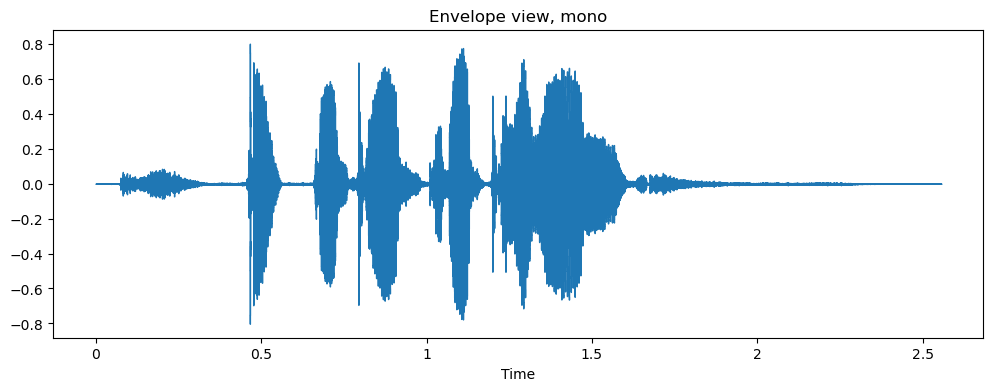

In [10]:
rand:int = random.randint(0, train_data.shape[0])

print(f'looking into index: {rand}')
print(f'sentence: {train_data.iloc[rand]["sentence"]}')

# filename
_ : list[str] = [x.filename for x in file_infos if train_data.iloc[rand]['id'] in x.filename]

# make sure file exists
if _[0].split('/')[-1] in os.listdir("/".join([DESTINATION_FOLDER, 'train_mp3s'])):
    audio_file: str = "./data/"+_[0]
    # Create an Audio object
    audio = Audio(audio_file)
else:
    specific_files_extract_from_zipfile(
        _, ZIP_FILE_PATH, DESTINATION_FOLDER
    )
    audio_file: str = "./data/"+_[0]
    # Create an Audio object
    audio = Audio(audio_file)

# Display the audio player
display(audio)

# Visuals
fig, ax = plt.subplots(figsize=(12, 4))

data,sample_rate = librosa.load(audio_file)
librosa.display.waveshow(data, sr=sample_rate)
ax.set(title='Envelope view, mono')
# ax.label_outer()
plt.show()

In [25]:
test_data

,id,sentence
0,0f3dac00655e,এছাড়াও নিউজিল্যান্ড এ ক্রিকেট দলের হয়েও খেলছ...
1,a9395e01ad21,এছাড়াও নিউজিল্যান্ড এ ক্রিকেট দলের হয়েও খেলছ...
2,bf36ea8b718d,এছাড়াও নিউজিল্যান্ড এ ক্রিকেট দলের হয়েও খেলছ...


In [11]:
test_data.iloc[-1]['sentence']

'এছাড়াও নিউজিল্যান্ড এ ক্রিকেট দলের হয়েও খেলছেন তিনি।'

# Cleanup

In [157]:
import shutil

# NOTE: Permanently deletes the directory and its content, and the operation cannot be undone.
shutil.rmtree(DESTINATION_FOLDER)

In [ ]:
# # using `os`

# # Step 1: Remove all files and subdirectories inside the specified directory.
# for root, dirs, files in os.walk(DESTINATION_FOLDER, topdown=False):
#     for file in files:
#         file_path = os.path.join(root, file)
#         os.remove(file_path)

#     for dir_name in dirs:
#         dir_path = os.path.join(root, dir_name)
#         os.rmdir(dir_path)

# # Step 2: Remove the main directory.
# os.rmdir(DESTINATION_FOLDER)

# Data processing using `AWS` services and resources

- try:
    - use `Glue`
    - use `EMR`
    
<br>

- not possible | feasible
    - `ec2`
    - `lambda`
    - `s3` & `SQS` | `SNS`


# TODO:

- add requirement file
- try python 3.11
- cleanup codes


# Scratch code

for reference

In [ ]:
# s3_resource = boto3.resource('s3')
# zip_obj = s3_resource.Object(bucket_name="bucket_name_here", key=zip_key)
# buffer = BytesIO(zip_obj.get()["Body"].read())

# z = zipfile.ZipFile(buffer)
# for filename in z.namelist():
#     file_info = z.getinfo(filename)
#     s3_resource.meta.client.upload_fileobj(
#         z.open(filename),
#         Bucket=bucket,
#         Key=f'{filename}'
#     )

In [ ]:
# folders: list[str] = list(
#     set(
#         [
#             x.filename.rsplit("_",1)[0]
#             for x in file_infos
#             if not x.filename.split("_")[0].startswith("examples")
#             and not x.filename.endswith(".csv")
#         ]
#     )
# )

In [ ]:
# from playsound import playsound
# # playsound("./data/"+"train_mp3s/7d5a2143f91a.mp3")#_[0])
# playsound("./data/"+_[0])

In [ ]:
# https://towardsdatascience.com/visualizing-audio-data-and-performing-feature-extraction-e1a489046000
# https://research.google/resources/datasets/bengali-asr/